# Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed

In this task you should target 3 classification tasks:
1. **Predicting  Adoption (binary classification task)**: create a new target from AdoptionSpeed that is 1 if AdoptionSpeed <> 4 and 0 otherwise.
2. **Predicting AdoptionSpeed (multiclass classification)**: in this task you should you the original target AdoptionSpeed, whose values are in the set {0, 1, 2, 3 , 4} (5 classes). This is a very difficult problem. You might also want to consider 3 classes (for instance {0-1, 2-3, 4}, or other sets that make sense). 
3. **Train specialized models for cats and dogs**: train with cat/dog instances and check whether the classification performance changes when Predicting Adoption and Predicting AdoptionSpeed.

## Intro

**You should:**

* Choose **one classifier in each category**: Tree models, Rule models, Linear models, Distance-based models, and Probabilistic models.
* Use cross-validation to evaluate the results. 
* Present and discuss the results for different evaluation measures, present confusion matrices. Remember that not only overall results are important. Check what happens when learning to predict each class.
* Describe the parameters used for each classifier and how their choice impacted or not the results.
* Choose the best classifier and fundament you choice.
* **Discuss critically your choices and the results!**

We have only categorical data, but most of it is binary so we need to find the best models, classifing this type of data. Although it's clear that since we transformed our data in mostly binary features, we will have a much better performance with the binary target, then with the multiclass classification problem.

Models to try:

* LogitRegression (Can be used in multiclass classification, combining multiple regression functions.)
  > Coeficient selection `l1-penalized`, solver `SAGA`
* SVM with Kernel
  > HyperParameter Selection - randomized search
* Random Forests
  > HyperParameter Selection - randomized search
* KNeighbors
* Categorical Naive Bayes

Feature Selection:

* RFE with with CV / metric - accuracy
* LassoCV with CV / metric - AIC & BIC

For feature selection we ended up deciding on using only `RFE`, since it is a more common aproach, and we have finite computational power. Combining feature and hyper parameter selection is a very expensive computacional task.

The Lasso method, would explore interesting metrics like the AIC and BIC metrics for measuring the information in a model.

Performance Analysis :

* Precision & Recall
* Confusion Matrix

This methods were only explored in the binary classification problem.

* Test Error vs Train Error
* ROC for every fold in CV
* Learning Curves

## Loading Datasets

In [15]:
#Get directory to files
import os
path = os.getcwd()
path = os.path.join(path,"datasets")
path

'C:\\Users\\peped\\Documents\\Repo\\MLproject\\datasets'

In [17]:
# Load data
import pandas as pd

Bl = pd.read_csv(os.path.join(path,"Balanced_Dataset.csv"), index_col=0)
Bn = pd.read_csv(os.path.join(path,'Binary_Dataset.csv'), index_col=0)
Bin = pd.read_csv(os.path.join(path,'Binary_Imbalanced_Dataset.csv'), index_col=0)

In [2]:
Bl.head()

,Type,Gender,FurLength,agecat,breedcat,namecat,descriptcat,colorcat,colorcat2,healthcat,statecat,MaturitySizecat,Photocat,quantitycat,paidcat,Target
0,2,1,1,2,0,0,0,1,1,0,1,0,1,0,1,2
1,2,1,2,0,0,0,0,1,1,0,0,1,2,0,0,0
2,1,1,2,0,0,0,0,1,1,1,1,1,5,0,0,3
3,1,2,1,2,0,1,0,1,1,1,0,1,5,0,1,2
4,1,1,1,0,0,1,0,0,1,0,1,1,3,0,0,2


In [3]:
Bn.head()

,Type,Gender,FurLength,agecat,breedcat,namecat,descriptcat,colorcat,colorcat2,healthcat,statecat,MaturitySizecat,Photocat,quantitycat,paidcat,Target
0,2,1,1,2,0,0,0,1,1,0,1,0,1,0,1,1
1,2,1,2,0,0,0,0,1,1,0,0,1,2,0,0,1
2,1,1,2,0,0,0,0,1,1,1,1,1,5,0,0,1
3,1,2,1,2,0,1,0,1,1,1,0,1,5,0,1,1
4,1,1,1,0,0,1,0,0,1,0,1,1,3,0,0,1


In [5]:
Bin.head()

,Type,Gender,FurLength,agecat,breedcat,namecat,descriptcat,colorcat,colorcat2,healthcat,statecat,MaturitySizecat,Photocat,quantitycat,paidcat
0,2,1,1,2,0,0,0,1,1,0,1,0,1,0,1
1,2,1,2,0,0,0,0,1,1,0,0,1,2,0,0
2,1,1,2,0,0,0,0,1,1,1,1,1,5,0,0
3,1,2,1,2,0,1,0,1,1,1,0,1,5,0,1
4,1,1,1,0,0,1,0,0,1,0,1,1,3,0,0


In [ ]:
#Create Multy class target
my = Bl['Target'].values
Bl = Bl.drop(['Target'], axis=1)
#Create Binary Target
by = Bn['Target'].values
Bn = Bn.drop(['Target'], axis=1)
#Create Binary Imbalanced Target
iby = Bin['Target'].values
Bin = Bin.drop(['Target'], axis=1)

## Importing Modules

In [18]:
##Import external Modules
import sys
import numpy as np
import math
import seaborn as sns
import time
import statistics 
import matplotlib.pyplot as plt
import Orange
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.preprocessing import TransactionEncoder
from sklearn.svm import l1_min_c
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, CategoricalNB
## Import developed modules
from AA_module import *

C:\Users\peped\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1.1. MultiClass Classification

### 1.1.1 LogitRegression

#### 1.1.1.1 Model training

In [43]:
#Create Classifier with l1_min penality

cs = l1_min_c(Bl, my, loss='log') * np.logspace(0, 7, 16)

logit = linear_model.LogisticRegression(penalty='l1', solver='saga',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True, multi_class= 'multinomial')
# warm_start allows the model the use already computed coeficcients 
# Create the RFE object and compute a cross-validated score.
k_folds = 10
best = 0
cv=StratifiedKFold(k_folds)
for i, c in enumerate(cs):
    print (i, ' of ', len(cs))
    logit.set_params(C=c)
    rfecv_logit = RFECV(estimator=logit, step=1, cv=cv,
            scoring='accuracy', n_jobs = k_folds)
    rfecv_logit.fit(Bl, my)
    if max(rfecv_logit.grid_scores_) > best:
        Brfecv_logit = rfecv_logit
print(len(cs),' of ', len(cs),' : Finished')

0  of  16
1  of  16
2  of  16
3  of  16
4  of  16
5  of  16
6  of  16
7  of  16
8  of  16
9  of  16
10  of  16
11  of  16
12  of  16
13  of  16
14  of  16
15  of  16
16  of  16  : Finished


In [4]:
#Recreate model
logit = linear_model.LogisticRegression(C=548.5764441274891, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000000, multi_class='multinomial', n_jobs=None,
                   penalty='l1', random_state=None, solver='saga', tol=1e-06,
                   verbose=0, warm_start=True)


#### 1.1.1.2 Model Parameters

In [44]:
print("Feature's Ranking \n")
for ix, cols in enumerate(Bl.columns):
    print(cols, ': ', Brfecv_logit.ranking_[ix])

Feature's Ranking 

Type :  1
Gender :  1
FurLength :  1
agecat :  1
breedcat :  1
namecat :  1
descriptcat :  1
colorcat :  1
colorcat2 :  1
healthcat :  1
statecat :  1
MaturitySizecat :  1
Photocat :  1
quantitycat :  1
paidcat :  1


Optimal number of features : 15


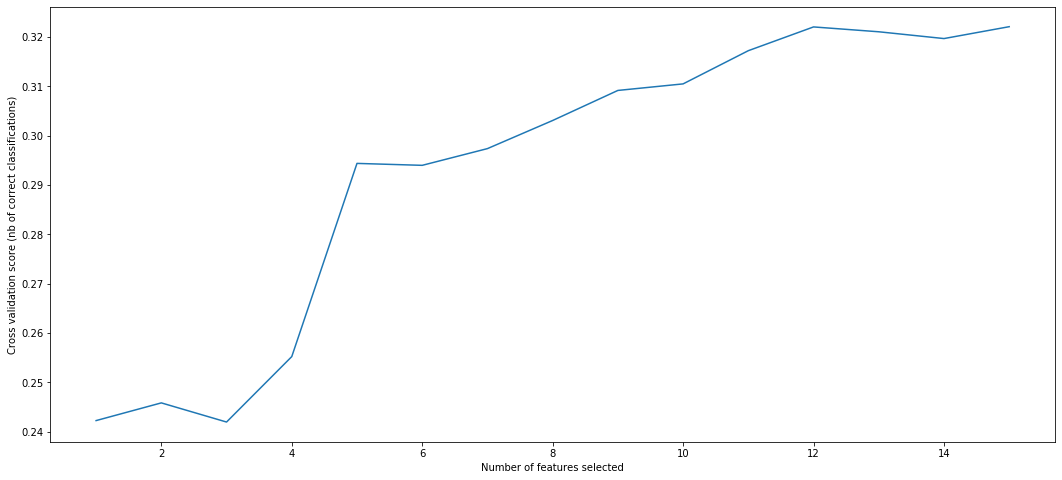

In [45]:
print("Optimal number of features : %d" % rfecv_logit.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(18, 8));
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(Brfecv_logit.grid_scores_) + 1), Brfecv_logit.grid_scores_)
plt.show()

In this case we see that all features were selected, but between using twelve and 15 features we don't see a big improvement on the score.

If we were running this function again we could increase the step number to allow the RFE to eliminate must of the weak features early, and this way create simplier model.


In [67]:
#get used features
#co_ = []
#for ix, cols in enumerate(Bl.columns):
#    if Brfecv_logit.ranking_[ix] == 1:
#        co_.append(cols)
#Logx = Bl[co_]
#print('Selected Features: \n', Logx.columns)
#Get Params
print('Param Selected: ', Brfecv_logit.estimator_.C)

Param Selected:  548.5764441274891


#### 1.1.1.3 Model Metrics

In [5]:
#Confusion Matrix
plt, metrics= model_metrics(Bl, my, logit, [1,2,3,4,5])
plt.show()
print(metrics)

KeyboardInterrupt: 

#### Model Remarks

We spent a lot of time training this model, so it could serve has a pipeline, for other models.

But in reality this iterative search for the best coeficient was not worth it, since this classifier simply can't classify this multi-class target, and the model didn't improve much by the search. 

Nevertheless it was good to test our pipeline and see there it's working. From now on will probably only do this type of extensive search in models that show promise.

### 1.1.2 SVM

For the support vector machine classifier, we decided to try the polynomial kernel, and the Gaussian kernel. 

Since we want our model to be able to create now linear decision boundaries, and to be able to classify a multi-class target, which excludes a sigmoid kernel. The later can only classify well binary targets, and it might be considered as a proxy to a neural network.

Let's start with a basic training of the kernels to see what the classifier is able to do. Have in mind that this is a very difficult problem to solve, and we will only use random parameters, so we are not excepting great results.

We start with the Polynomial kernel

#### 1.1.2.1 Basic Classifier Testing

<Figure size 1296x576 with 0 Axes>

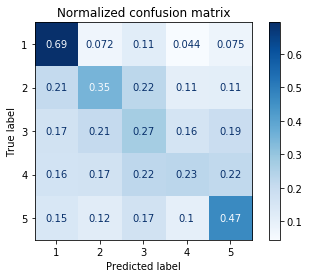

              precision    recall  f1-score   support

           0       0.52      0.69      0.60      1045
           1       0.38      0.35      0.36       956
           2       0.27      0.27      0.27       962
           3       0.35      0.23      0.28       954
           4       0.46      0.47      0.46      1019

    accuracy                           0.41      4936
   macro avg       0.39      0.40      0.39      4936
weighted avg       0.40      0.41      0.40      4936



In [18]:
#Create SVM
svclassifier = SVC(kernel='poly', degree=5, C=1)
#Create Metrics
plt, metrics= model_metrics(Bl, my, svclassifier, [1,2,3,4,5])
plt.show()
print(metrics)

It was able to classify the 0 speed category pretty well, although the general result was bad. Let's now see the Gaussian Kernel.

<Figure size 1296x576 with 0 Axes>

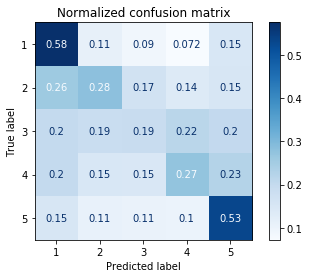

              precision    recall  f1-score   support

           0       0.43      0.58      0.49      1079
           1       0.34      0.28      0.31      1024
           2       0.26      0.19      0.22       970
           3       0.33      0.27      0.30       976
           4       0.43      0.53      0.47      1036

    accuracy                           0.38      5085
   macro avg       0.36      0.37      0.36      5085
weighted avg       0.36      0.38      0.36      5085



In [6]:
svclassifier = SVC(kernel='rbf', C=1)
plt, metrics= model_metrics(Bl, my, svclassifier, [1,2,3,4,5])
plt.show()
print(metrics)

This kernel get's worst results them the previous, they both seem to be better at classification in the extreme cases.

#### 1.1.2.2 One Vs Rest Classifier Methodology

(Explain Methodology and why it's useful)

<Figure size 1296x576 with 0 Axes>

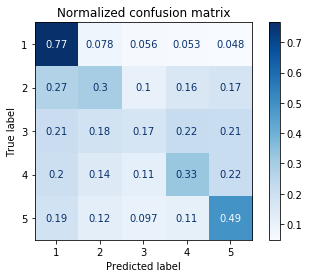

              precision    recall  f1-score   support

           0       0.49      0.77      0.59      1079
           1       0.37      0.30      0.33      1024
           2       0.30      0.17      0.22       970
           3       0.37      0.33      0.35       976
           4       0.44      0.49      0.47      1036

    accuracy                           0.42      5085
   macro avg       0.39      0.41      0.39      5085
weighted avg       0.40      0.42      0.40      5085



In [7]:
svclassifier = OneVsRestClassifier(SVC(kernel='poly', degree=5, C=1))
plt, metrics= model_metrics(Bl, my, svclassifier, [1,2,3,4,5])
plt.show()
print(metrics)

Obtains slightly better results, but needs 5times the computacion time.

#### 1.1.2.3 Feature Selection

Since polynomial svm don't give information about features importance recursive methods like `RFE`cannot be applied, so we use our previously defined general feature selection. This function through vif scores and feature importance methods is able to select the features that are more likely to give new information to the classifier.

In [4]:
#Select Features
X = feature_selector(Bl, my)
X.shape[1]

dropping 'Type' at index: 0
dropping 'Gender' at index: 0
dropping 'FurLength' at index: 0
Remaining variables:
Index(['agecat', 'breedcat', 'namecat', 'descriptcat', 'colorcat', 'colorcat2',
       'healthcat', 'statecat', 'MaturitySizecat', 'Photocat', 'quantitycat',
       'paidcat'],
      dtype='object')


3

Since only 3 features were selected we will have to change our degree, we cannot fit a 5 degree polynomial function on only 3 features. With such low feature number fitting a kernel will not ensure better results so let's try using the linear SVM.

<Figure size 1296x576 with 0 Axes>

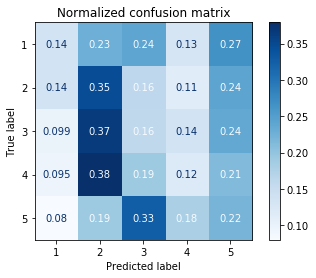

              precision    recall  f1-score   support

           0       0.26      0.14      0.18      1079
           1       0.23      0.35      0.28      1024
           2       0.14      0.16      0.15       970
           3       0.17      0.12      0.14       976
           4       0.19      0.22      0.20      1036

    accuracy                           0.20      5085
   macro avg       0.20      0.20      0.19      5085
weighted avg       0.20      0.20      0.19      5085



In [11]:
svclassifier = OneVsRestClassifier(SVC(kernel='linear', C=1))
plt, metrics= model_metrics(X, my, svclassifier, [1,2,3,4,5])
plt.show()
print(metrics)

We obtain worse results, so we will use all features.

#### 1.1.2.4 Hyper-Parameter Selection

Let's now find a good set of hyper parameters trough a random search, since is much less computationally expensive them
a grid search and there are evidence that the results will not differ much. Cite

This computation will take about 5 h, it will test 20 sets of parameters from discrete parameters distributions, with a 10 k-fold cross validation on every model, and for every model it will use one vs rest methodology, since we've seen that it obtains best results, therefore creating 5 sub-models.

Since it's a very heavy computation we will not actually run it, because we have no access to any server. But if we were doing this for real this was the correct way.

In [ ]:
#Hyper-Parameter Search
#svc_param_selection(Bl, my, 10, 20)

#### Model Remarks

We were not expecting to obtain a great deal of performance from the linear models, since this is a categorical dataset. But in the polynomial SVM we obtained a not so bad performance given the number of categories to classify. This performance could probably be improved by the previously discussed algorithm.

After considering the computation time for hyper-parameters, feature selection, and other methods we consider that could improve the performance of the models we are training decided that from now on we will only use basic approach to training. 

This will allow us to see more models and different approaches to multi-class classifier training. And since this is not a work for publication the slight improve in model performance isn't work the time spent training this models in this more complex manner.

We might open an exception for a particularly promising model.

### 1.1.3 Random Forests

#### 1.1.3.1 Basic Training

<Figure size 1296x576 with 0 Axes>

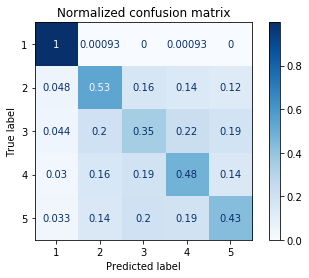

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1079
           1       0.52      0.53      0.53      1024
           2       0.38      0.35      0.36       970
           3       0.46      0.48      0.47       976
           4       0.50      0.43      0.46      1036

    accuracy                           0.57      5085
   macro avg       0.55      0.56      0.55      5085
weighted avg       0.55      0.57      0.56      5085



In [19]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
#Create Metrics
plt, metrics= model_metrics(Bl, my, clf, [1,2,3,4,5])
plt.show()
print(metrics)

We get very good results, our classifier is not over-fitting any class, and very good at classifying class 0, with a perfect recall and a 90% precision.

This was achived due to the use of `tommek links` to perform under-sampling, this methodology allows us to clearly separate the minority class by having all majority class data points near the minority class removed.

#### 1.1.3.2 Feature Selection

Let's now apply `RFE` to see if we can improve our classifier's performance.

In [22]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
rfecv_ET = RFECV(estimator=clf, step=5, cv=10,
            scoring='accuracy', n_jobs = 10)
rfecv_ET.fit(Bl, my)

RFECV(cv=10,
      estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
      min_features_to_select=1, n_jobs=10, scoring='accuracy', step=5,
      verbose=0)

Optimal number of features : 15


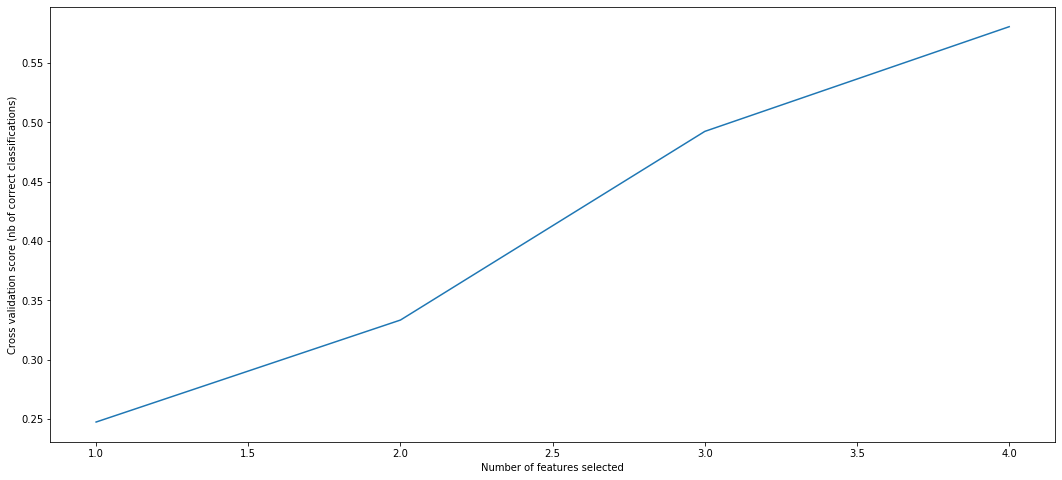

In [23]:
print("Optimal number of features : %d" % rfecv_ET.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(18, 8));
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_ET.grid_scores_) + 1), rfecv_ET.grid_scores_)
plt.show()

We used a bigger step in the `RFE` function so that it can earlier eliminate the not important features. But we see that the best result we obtain is using all the features.

#### 1.1.3.2 Hyper-Parameter Selection

Since this is our best model yet, and the decision tree classifier is a fast model to train, cause in reality is only fitting a small number of features, we will apply a bit of hyper-parameter selection.

This type of classifier has many hyper-parameters so will select some to check.

We will do a randomized search, with a low number of iteration (in reality this number should be higher)

In [7]:
clf = ExtraTreesClassifier()
model, improvement = et_Srandom(clf, Bl, my, 0.57, 100, 3)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished


In [24]:
print('Improvement of {:0.2f}%.'.format(improvement))
model.best_estimator_

Improvement of 0.39%.


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [26]:
print('Performance: ', round((0.57 * 1.0039), 4))

Performance:  0.57


0.5722082903083051

We had a 0.4% increase in our performance it's not much, but since this problem is so complex it's expected.

If we wanted to improve performance even further we could shorten our grid based on this results and do a grid search.

In [4]:
#Train final model
final_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
final_model
final_model.fit(Bl, my)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

### 1.1.4 K-neighbors

#### 1.1.4.1 Basic Training

<Figure size 1296x576 with 0 Axes>

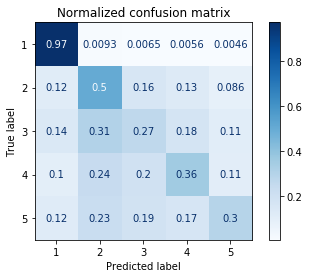

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      1079
           1       0.40      0.50      0.45      1024
           2       0.32      0.27      0.29       970
           3       0.42      0.36      0.39       976
           4       0.50      0.30      0.37      1036

    accuracy                           0.49      5085
   macro avg       0.47      0.48      0.46      5085
weighted avg       0.47      0.49      0.47      5085



In [4]:
clf = KNeighborsClassifier(n_neighbors=3)
plt, metrics= model_metrics(Bl, my, clf, [1,2,3,4,5])
plt.show()
print(metrics)

Right out of the top, using only random parameters and features, we get a pretty good result. Now we need to apply a one vs rest approach to see if we get better results.

<Figure size 1296x576 with 0 Axes>

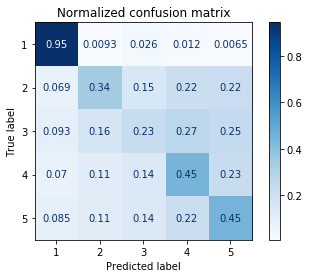

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1079
           1       0.47      0.34      0.40      1024
           2       0.33      0.23      0.27       970
           3       0.38      0.45      0.41       976
           4       0.40      0.45      0.43      1036

    accuracy                           0.49      5085
   macro avg       0.47      0.48      0.47      5085
weighted avg       0.47      0.49      0.48      5085



In [26]:
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
plt, metrics= model_metrics(Bl, my, clf, [1,2,3,4,5])
plt.show()
print(metrics)

The general result is the same but if we look closely, we see that we now have a much more precise model, although we add to give some of the recall. This new model is more versatile, being able to classify better more features, by losing some of it's performance on others.

#### 1.1.4.2 Feature Selection

In [5]:
#Select Features
X = feature_selector(Bl, my)
X.shape[1]

dropping 'Type' at index: 0
dropping 'Gender' at index: 0
dropping 'FurLength' at index: 0
Remaining variables:
Index(['agecat', 'breedcat', 'namecat', 'descriptcat', 'colorcat', 'colorcat2',
       'healthcat', 'statecat', 'MaturitySizecat', 'Photocat', 'quantitycat',
       'paidcat'],
      dtype='object')


3

<Figure size 1296x576 with 0 Axes>

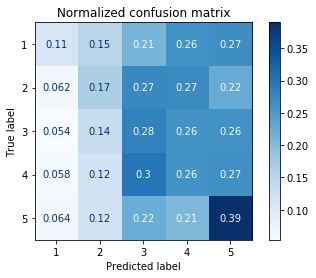

              precision    recall  f1-score   support

           0       0.32      0.11      0.16      1079
           1       0.24      0.17      0.20      1024
           2       0.21      0.28      0.24       970
           3       0.20      0.26      0.23       976
           4       0.28      0.39      0.33      1036

    accuracy                           0.24      5085
   macro avg       0.25      0.24      0.23      5085
weighted avg       0.25      0.24      0.23      5085



In [6]:
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
plt, metrics= model_metrics(X, my, clf, [1,2,3,4,5])
plt.show()
print(metrics)

Since the `KNN` classifier doesn't register feature importance we cannot apply an recursive technique like `RFE`, so we use our pre-selected features to see if that improves performance. We see that it does not so we stick with using all features.

#### 1.1.4.3 Hyper-Parameter Selection

As previously happened in this part we will try to improve our model performance by iteratively searching for the best hyper-parameters. We will start by doing a general randomized search in predefined parameter grid. 

In [22]:
clf = KNeighborsClassifier()
model, improvement = knn_Srandom(clf, Bl, my, 0.49, 50, 5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   47.9s finished


In [24]:
print('Performance: ', round((model.best_score_), 4))
print('Improvement of {:0.2f}%.'.format(improvement))
print('Improved Model:')
model.best_estimator_

Performance:  0.551
Improvement of 12.45%.
Improved Model:


KNeighborsClassifier(algorithm='auto', leaf_size=49, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='distance')

Our model improved by 12% using this new combination of parameters for this particular problem this is real good, we weren't using the full potential of our classifier. Now to make sure we reached `KNN`'s limitation's we will apply a grid search using a shorter grid based on this results, to see if we have any improvements.

Since `KNN`is very quick to train/test comparing with other models used that have long training times but can be tested instantly, we should be able to run this search without taking much time.

In [26]:
#Define classifier
clf = KNeighborsClassifier()
#Define Grid
grid = {'n_neighbors': list(range(6,10)),
        'leaf_size': list(range(40,60)),
        'weights': ['distance'],
        'p': [1]}

# Use the random grid to search for best hyper-parameters
rf_random = GridSearchCV(estimator=clf, param_grid=grid,
                          cv=5, verbose=2, n_jobs=-1)

# Fit the random search model
rf_random.fit(Bl, my)

#Evaluate improvements
improv = (100 * (rf_random.best_score_ - 0.551) / 0.551)
time.sleep(0.5)
print('Improvement of {:0.2f}%.'.format(improv))
model.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.2min finished


Improvement of 0.00%.


KNeighborsClassifier(algorithm='auto', leaf_size=49, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='distance')

We now are sure the previously found model is the best we could obtain using this classifier, since this search gave us exactly the same model.

Since our model improved so much we should evaluate all the metrics again to see whats happening, and make sure it's not over-fitting.

Have in mind that we **previously applied cross-validation** and now we will do a simple split, so the **results might be slightly different**, but with a simple split we make more clear possible over-fitting.

Also we will apply the same model but with a OnevsRest method.

<Figure size 1296x576 with 0 Axes>

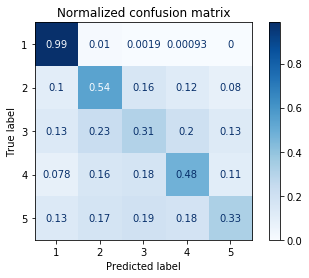

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1079
           1       0.49      0.54      0.52      1024
           2       0.36      0.31      0.33       970
           3       0.48      0.48      0.48       976
           4       0.52      0.33      0.40      1036

    accuracy                           0.53      5085
   macro avg       0.51      0.53      0.51      5085
weighted avg       0.52      0.53      0.51      5085



In [29]:
clf = (KNeighborsClassifier(algorithm='auto', leaf_size=49, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='distance'))
plt, metrics= model_metrics(Bl, my, clf, [1,2,3,4,5])
plt.show()
print(metrics)

<Figure size 1296x576 with 0 Axes>

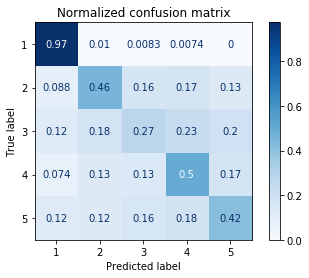

              precision    recall  f1-score   support

           0       0.72      0.97      0.83      1079
           1       0.52      0.46      0.49      1024
           2       0.36      0.27      0.31       970
           3       0.45      0.50      0.47       976
           4       0.47      0.42      0.44      1036

    accuracy                           0.53      5085
   macro avg       0.50      0.52      0.51      5085
weighted avg       0.51      0.53      0.51      5085



In [28]:
clf = OneVsRestClassifier(KNeighborsClassifier(algorithm='auto', leaf_size=49, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='distance'))
plt, metrics= model_metrics(Bl, my, clf, [1,2,3,4,5])
plt.show()
print(metrics)

Comparing this to models with our initial models, we see an overall improvement, with the same differences between using the or not the One vs rest approach. We are more or less choosing between precision and recall with some class better defined in one and others in the other. Choosing between this to models would be largely dependent by the actual practical use of the model, in the rest of this work we will consider the simplest model to be the best, since we consider this a good practice when their is no reason for using the more complex model.

### 1.1.5 Categorical Naive Bayes

<Figure size 1296x576 with 0 Axes>

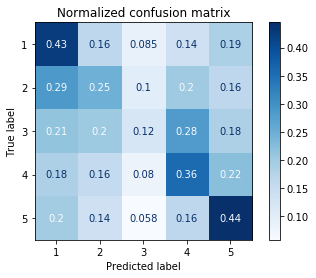

              precision    recall  f1-score   support

           0       0.34      0.43      0.38      1079
           1       0.28      0.25      0.26      1024
           2       0.26      0.12      0.16       970
           3       0.30      0.36      0.33       976
           4       0.38      0.44      0.41      1036

    accuracy                           0.32      5085
   macro avg       0.31      0.32      0.31      5085
weighted avg       0.31      0.32      0.31      5085



In [41]:
clf = OneVsRestClassifier(CategoricalNB())
plt, metrics= model_metrics(Bl, my, clf, [1,2,3,4,5])
plt.show()
print(metrics)

This classifier performs really poorly so any improvement on his performance would not be significative. This way we decided not to do further analysis on it. 

### 1.1.6 Rule Based

In [86]:
Bl['Target'] = my
from Orange.data import Domain, DiscreteVariable, Table, ContinuousVariable
domain = Domain([DiscreteVariable.make(name='Type', values=['1', '2']),
                 DiscreteVariable.make(name='Gender', values=['1', '2', '3']),
                 DiscreteVariable.make(name='FurLength', values=['1', '2']),
                 DiscreteVariable.make(name='agecat', values=['0','1', '2', '3','4']),
                 DiscreteVariable.make(name='breedcat', values=['0', '1']),
                 DiscreteVariable.make(name='namecat', values=['0', '1']),
                 DiscreteVariable.make(name='descriptcat', values=['0', '1']),
                 DiscreteVariable.make(name='colorcat', values=['0','1', '2']),
                 DiscreteVariable.make(name='colorcat2', values=['0', '1']),
                 DiscreteVariable.make(name='healthcat', values=['0', '1']),
                 DiscreteVariable.make(name='statecat', values=['0', '1']),
                 DiscreteVariable.make(name='MaturitySizecat', values=['0', '1']),
                 DiscreteVariable.make(name='Photocat', values=['0','1', '2', '3','4', '5']),
                 DiscreteVariable.make(name='quantitycat', values=['0', '1']),
                 DiscreteVariable.make(name='paidcat', values=['0', '1'])],
                 DiscreteVariable(name='Target', values=['0','1', '2', '3','4']))
data = Table.from_numpy(domain,Bl)
data.domain

[Type, Gender, FurLength, agecat, breedcat, namecat, descriptcat, colorcat, colorcat2, healthcat, statecat, MaturitySizecat, Photocat, quantitycat, paidcat | Target]

In [96]:
learner = Orange.classification.CN2UnorderedLearner()

# consider up to 10 solution streams at one time
learner.rule_finder.search_algorithm.beam_width = 10

# continuous value space is constrained to reduce computation time
learner.rule_finder.search_strategy.constrain_continuous = True

# found rules must cover at least 15 examples
learner.rule_finder.general_validator.min_covered_examples = 15

# found rules may combine at most 2 selectors (conditions)
learner.rule_finder.general_validator.max_rule_length = 2

res = Orange.evaluation.CrossValidation(data, [learner], k=10)

C:\Users\peped\Miniconda3\envs\AA\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: calling Validation's constructor with data and learners is deprecated;
construct an instance and call it
  from ipykernel import kernelapp as app


TypeError: __init__() got an unexpected keyword argument 'pos_label'

In [23]:
#Don't know how to get scores for multi-class problem
#CA = Orange.evaluation.CA(res)
#F1 = Orange.evaluation.F1(res)

#print('Accuracy: ', CA)
#print('F1: ', F1)

Unfortunately the `Orange3` python libraries are **very under documented**, which to many problems, like this, we were able to load the dataset into an Orange table, create, and train the classifier using cross-validation. But when we try to get the scores, can't since it's a multi-class problem and it only returns one set of metrics we need to specify the way we want to average the results. Has this isn't documented anywhere, we are not able to do it, we tried many different parameters but nothing works, we even tried using the source code to see what was being done, but since it's a wrapper for the `sklearn` classification functions it's not clear.

In [85]:
Bl = Bl.drop(['Target'], axis=1)

### 1.1.7 Voting Classifier 

In this part we will apply a voting classifier, in short this methodology uses a group of classifiers to make predictions on the same data, them it ensembles the results by considering each classifier's prediction as a vote, in this case we are using a majority vote, but a weight vote code also be used. 

We will create the voting classifier and them train it with 10 fold cross-validation selecting the best scoring model.

For the voting we will use first a majority voting method, this can have some issues since it's gonna have a lot of ties and deals with them alphabetically which basically random. Our second voting stratagie will be an weighted voting (soft voting), where the weights are the models probability for that class. In this stratagie we can also had specifical weights for each classifier, although won't since we have two similary performing classifiers.

#### Hard Voting

In [11]:
#Define Tree model
clf1 = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
#Define KNN model
clf2 = KNeighborsClassifier(algorithm='auto', leaf_size=49, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='distance')
#Create model list
clf_l = [('ET', clf1), ('KNN', clf2)]
#Define Voting Classifier
Vclf = VotingClassifier(estimators=clf_l, voting='hard')

<Figure size 1296x576 with 0 Axes>

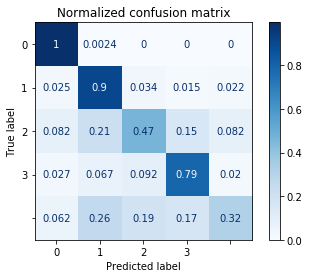

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       420
           1       0.63      0.90      0.74       408
           2       0.59      0.47      0.52       401
           3       0.70      0.79      0.75       403
           4       0.72      0.32      0.44       401

    accuracy                           0.70      2033
   macro avg       0.70      0.70      0.67      2033
weighted avg       0.70      0.70      0.68      2033

Quadratic Kappa Metric:  0.6790213850864144
Final model:


VotingClassifier(estimators=[('ET',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='entropy',
                                                   max_depth=40,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=5,
                                                   min_weight_fraction_leaf=0.0,
                                

In [12]:
plt, estimator, metrics, quad_kappa = cv_metrics(Bl, my, Vclf, [0,1,2,3,4], 10)
plt.show()
print(metrics)
print('Quadratic Kappa Metric: ', quad_kappa)
print('Final model:')
estimator

We can see that our new model can classify all the class very well, having some difficulties classifying the second and forth classes. This result is very good, even with those difficulties, not being able to classify the forth class is not a very big problem since the separation of the forth class from the others will be better addressed in the binary target task.

Regarding the task of classifying the rest of the classes this has an overall better performance, which was expect since it combines the ability of two different very good classifiers. Our support is less since we are using less testing data, them what was used when performing a simple dataset split.

#### Soft Voting

In [9]:
#Define Tree model
clf1 = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
#Define KNN model
clf2 = KNeighborsClassifier(algorithm='auto', leaf_size=49, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='distance')
#Create model list
clf_l = [('ET', clf1), ('KNN', clf2)]
#Define Voting Classifier
Vclf = VotingClassifier(estimators=clf_l, voting='soft')

<Figure size 1296x576 with 0 Axes>

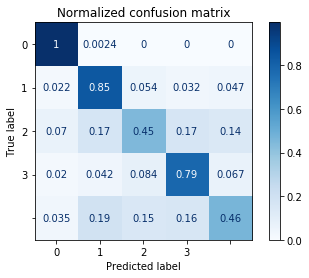

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       420
           1       0.68      0.85      0.75       408
           2       0.61      0.45      0.52       401
           3       0.69      0.79      0.73       403
           4       0.64      0.46      0.54       401

    accuracy                           0.71      2033
   macro avg       0.70      0.71      0.70      2033
weighted avg       0.70      0.71      0.70      2033

Quadratic Kappa Metric:  0.7347801010753885
Final model:


VotingClassifier(estimators=[('ET',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='entropy',
                                                   max_depth=40,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=5,
                                                   min_weight_fraction_leaf=0.0,
                                

In [10]:
plt, estimator, metrics, quad_kappa = cv_metrics(Bl, my, Vclf, [0,1,2,3,4], 10)
plt.show()
print(metrics)
print('Quadratic Kappa Metric: ', quad_kappa)
print('Final model:')
estimator

By using soft voting we were able to improve our all around performance even further, we add some class that lost some recall but in terms of the `f1-score` all got better results. This was expect since an hard voting classifier solves ties (which are bound to happen in a 2 classifier system) by choosing the class that comes first in alphabetical order. This would lead in a first model to a miss perception, that we couldn't classify the last class that we have now seen that it's not true. Our soft voting classifier doesn't have ties (normally) since it choses the class based on the confidence of the classifiers of data result (probability). This has it's own problems since the classifiers are not always well calibrated.

Our final model presents a really good result, if consider the results obtain for the *Kaglle* competicion we are way a head of that. The results were measured using the quadratic kappa metric, which is basically a weighted accuracy, the winning result was 0.46, and we were able to get 0.71 were the maximum was 1. This is a **54% increase on performance** compared to the winning result!

We could go beyond of what was done here by using different combinations of classifiers (and weights), features, hyper-parameters, and voting strategies. In this part we didn't use weights since we are using two classifiers only, which add an initial similar performance (so we don't want to have different weights).

By using a soft voting strategy we assume good model calibration, given that we cannot plot the model calibration curve for multi-label targets, this could not have wielded such great results. And even now we cannot be completely sure that this model is not favoring more one of the classifiers, based only on the fact, that it has an higher confidence of it's results them what it actually should.

But the reality is that as we previously clarified we are happy with the model we obtained 

## 1.2. Binary Classification

### 1.2.1 LogitRegression

#### 1.2.1.1 Basic Training

<Figure size 1296x576 with 0 Axes>

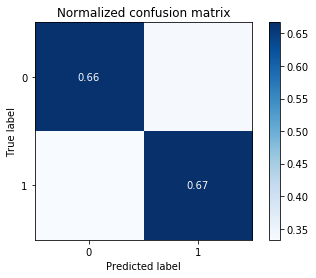

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      2669
           1       0.67      0.67      0.67      2709

    accuracy                           0.67      5378
   macro avg       0.67      0.67      0.67      5378
weighted avg       0.67      0.67      0.67      5378



In [22]:
logit = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True)
#Create Metrics
plt, metrics= model_metrics(Bn, by, logit, [0,1])
plt.show()
print(metrics)

#### 1.2.1.1 Feature Selection

Let's now apply `RFE` to see if we can improve our classifier's performance.

In [19]:
logit = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True)
rfecv_ET = RFECV(estimator=logit, step=1, cv=10,
            scoring='accuracy', n_jobs = -1, verbose= 1)
rfecv_ET.fit(Bn, by)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


RFECV(cv=10,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=1000000,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l1', random_state=None,
                                   solver='liblinear', tol=1e-06, verbose=0,
                                   warm_start=True),
      min_features_to_select=1, n_jobs=-1, scoring='accuracy', step=1,
      verbose=2)

Optimal number of features : 12


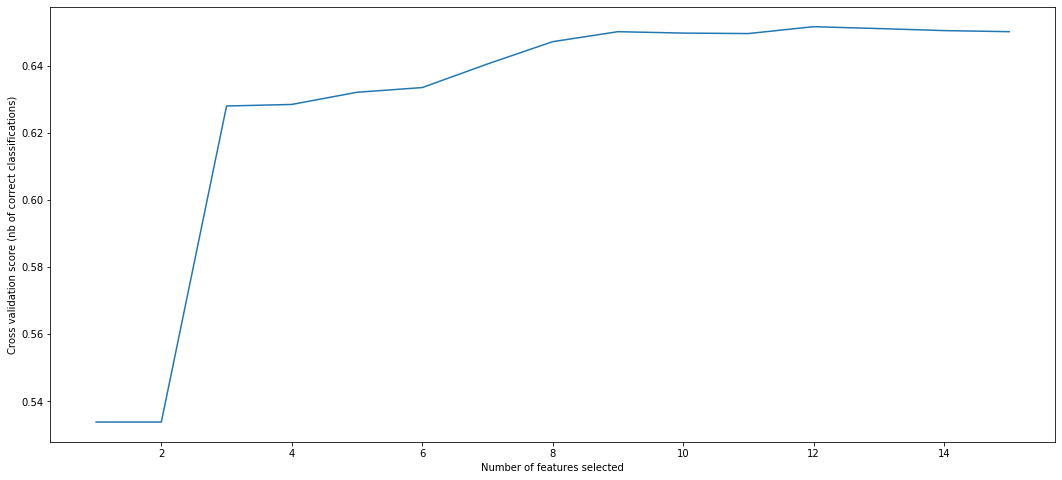

In [20]:
print("Optimal number of features : %d" % rfecv_ET.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(18, 8));
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_ET.grid_scores_) + 1), rfecv_ET.grid_scores_)
plt.show()

In [21]:
rfecv_ET.grid_scores_

array([0.53, 0.53, 0.63, 0.63, 0.63, 0.63, 0.64, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65])

In [45]:
Bl.columns[0:8]

Index(['Type', 'Gender', 'FurLength', 'agecat', 'breedcat', 'namecat',
       'descriptcat', 'colorcat'],
      dtype='object')

We see that although 12 features were selected after the eight feature there is no major difference, so we will use just the first 8 features. 

The selected features are `'Type', 'Gender', 'FurLength', 'agecat', 'breedcat', 'namecat', 'descriptcat', 'colorcat'`.

<Figure size 1296x576 with 0 Axes>

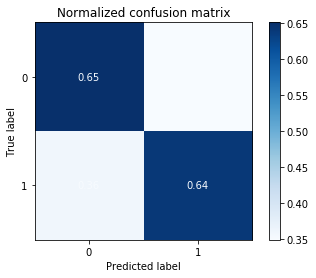

              precision    recall  f1-score   support

           0       0.64      0.65      0.65      2669
           1       0.65      0.64      0.65      2709

    accuracy                           0.65      5378
   macro avg       0.65      0.65      0.65      5378
weighted avg       0.65      0.65      0.65      5378



In [44]:
logit = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True)
#Create Metrics
plt, metrics= model_metrics(Bn.iloc[:,0:8], by, logit, [0,1])
plt.show()
print(metrics)

We see that we obtain very similar metrics using only half of the features

#### 1.2.1.3 Hyper-Parameter Selection

In [48]:
#Create Classifier with l1_min penality
cs = l1_min_c(Bl, my, loss='log') * np.logspace(0, 7, 16)
logit = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True)
# warm_start allows the model the use already computed coeficcients
clf = GridSearchCV(logit, {'C': cs}, verbose= 1)
clf.fit(Bn.iloc[:,0:8], by)
clf.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.8s finished


LogisticRegression(C=21.793193953934416, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000000, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='liblinear',
                   tol=1e-06, verbose=0, warm_start=True)

<Figure size 1296x576 with 0 Axes>

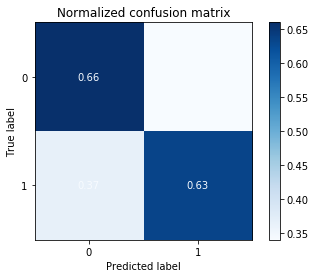

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2669
           1       0.65      0.63      0.64      2709

    accuracy                           0.65      5378
   macro avg       0.65      0.65      0.65      5378
weighted avg       0.65      0.65      0.65      5378



In [49]:
logit = LogisticRegression(C=21.793193953934416, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000000, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='liblinear',
                   tol=1e-06, verbose=0, warm_start=True)
#Create Metrics
plt, metrics= model_metrics(Bn.iloc[:,0:8], by, logit, [0,1])
plt.show()
print(metrics)

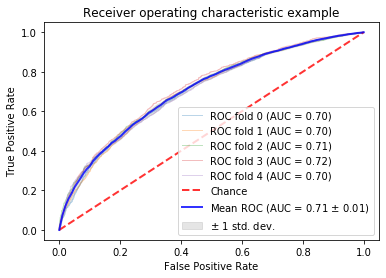

In [51]:
#Plot Roc Curve
roc_metrics(Bn,by, logit, 5)
plt.show()

### 1.2.2 SVM

<Figure size 1296x576 with 0 Axes>

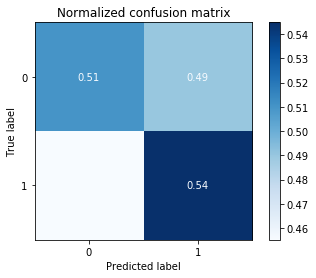

              precision    recall  f1-score   support

           0       0.52      0.51      0.52      2669
           1       0.53      0.54      0.54      2709

    accuracy                           0.53      5378
   macro avg       0.53      0.53      0.53      5378
weighted avg       0.53      0.53      0.53      5378



In [10]:
#Create SVM
svclassifier = SVC(kernel='sigmoid', C=1)
#Create Metrics
plt, metrics= model_metrics(Bn, by, svclassifier, [0,1])
plt.show()
print(metrics)

### 1.2.3 Random Forests

#### 1.2.3.1 Basic Training

<Figure size 1296x576 with 0 Axes>

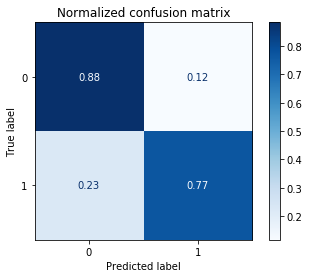

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      2669
           1       0.87      0.77      0.82      2709

    accuracy                           0.83      5378
   macro avg       0.83      0.83      0.83      5378
weighted avg       0.83      0.83      0.83      5378



In [7]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
#Create Metrics
plt, metrics= model_metrics(Bn, by, clf, [0,1])
plt.show()
print(metrics)

#### 1.2.3.2 Feature Selection

Let's now apply `RFE` to see if we can improve our classifier's performance.

In [19]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
rfecv_ET = RFECV(estimator=clf, step=3, cv=10,
            scoring='accuracy', n_jobs = 10)
rfecv_ET.fit(Bn, by)

RFECV(cv=10,
      estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
      min_features_to_select=1, n_jobs=10, scoring='accuracy', step=3,
      verbose=0)

Optimal number of features : 15


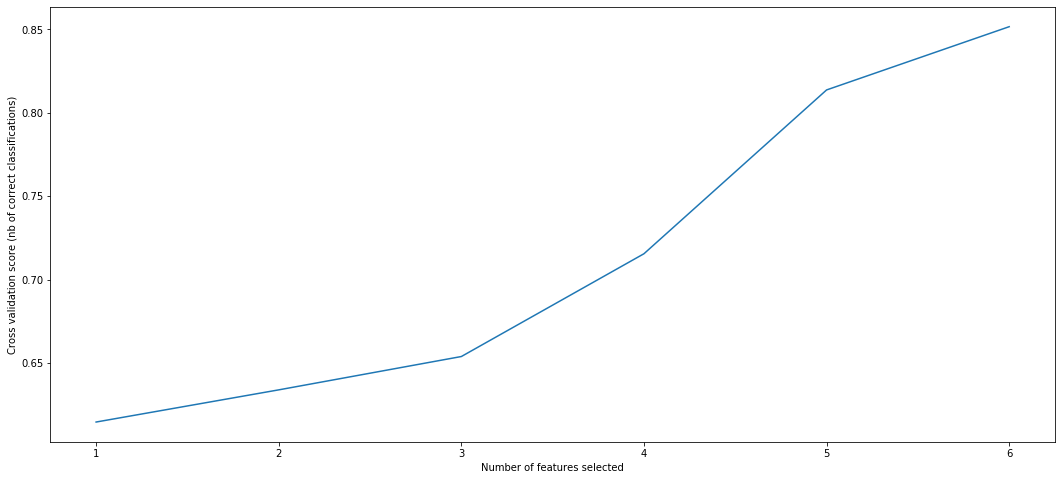

In [20]:
print("Optimal number of features : %d" % rfecv_ET.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(18, 8));
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_ET.grid_scores_) + 1), rfecv_ET.grid_scores_)
plt.show()

We used a bigger step in the `RFE` function so that it can earlier eliminate the not important features. But we see that the best result we obtain is using all the features.

#### 1.1.3.2 Hyper-Parameter Selection

Since this is our best model yet, and the decision tree classifier is a fast model to train, cause in reality is only fitting a small number of features, we will apply a bit of hyper-parameter selection.

This type of classifier has many hyper-parameters so will select some to check.

We will do a randomized search, with a low number of iteration (in reality this number should be higher)

In [21]:
clf = ExtraTreesClassifier()
model, improvement = et_Srandom(clf, Bn, by, 0.83, 100, 5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   41.6s


KeyboardInterrupt: 

In [24]:
print('Improvement of {:0.2f}%.'.format(improvement))
model.best_estimator_

Improvement of 0.39%.


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [26]:
print('Performance: ', round((0.57 * 1.0039), 4))

Performance:  0.57


0.5722082903083051

We had a 0.4% increase in our performance it's not much, but since this problem is so complex it's expected.

If we wanted to improve performance even further we could shorten our grid based on this results and do a grid search.

In [4]:
#Train final model
final_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
final_model
final_model.fit(Bl, my)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

<Figure size 1296x576 with 0 Axes>

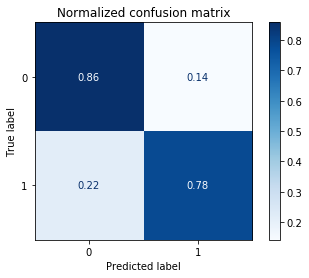

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2669
           1       0.85      0.78      0.82      2709

    accuracy                           0.82      5378
   macro avg       0.82      0.82      0.82      5378
weighted avg       0.82      0.82      0.82      5378



In [52]:
clf = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
plt, estimator, metrics = cv_metrics(Bn, by, Vclf, [0,1], 5, quad=False)
plt.show()
print(metrics)

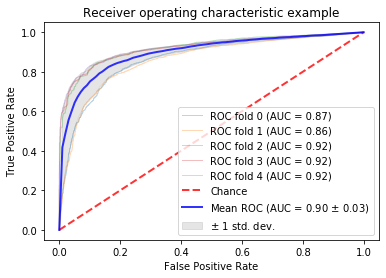

In [53]:
#Plot Roc Curve
roc_metrics(Bn,by, clf, 5)
plt.show()

### 1.2.4 K-neighbors

#### 1.2.4.1 Basic Training

<Figure size 1296x576 with 0 Axes>

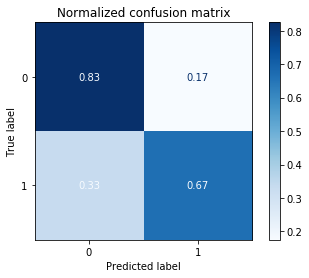

              precision    recall  f1-score   support

           0       0.71      0.83      0.76      2669
           1       0.79      0.67      0.72      2709

    accuracy                           0.74      5378
   macro avg       0.75      0.75      0.74      5378
weighted avg       0.75      0.74      0.74      5378



In [24]:
clf = (KNeighborsClassifier(n_neighbors=3))
#Create Metrics
plt, metrics= model_metrics(Bn, by, clf, [0,1])
plt.show()
print(metrics)

#### 1.2.4.2 Hyper-Parameter Selection

As previously happened in this part we will try to improve our model performance by iteratively searching for the best hyper-parameters. We will start by doing a general randomized search in predefined parameter grid. 

In [27]:
clf = KNeighborsClassifier()
model, improvement = knn_Srandom(clf, Bn, by, 0.74, 50, 5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   54.7s finished


In [28]:
print('Performance: ', round((model.best_score_), 4))
print('Improvement of {:0.2f}%.'.format(improvement))
print('Improved Model:')
model.best_estimator_

Performance:  0.7999
Improvement of 8.10%.
Improved Model:


KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='distance')

<Figure size 1296x576 with 0 Axes>

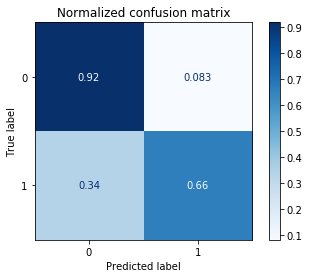

              precision    recall  f1-score   support

           0       0.73      0.92      0.81      2669
           1       0.89      0.66      0.76      2709

    accuracy                           0.79      5378
   macro avg       0.81      0.79      0.78      5378
weighted avg       0.81      0.79      0.78      5378



In [13]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='distance')
plt, estimator, metrics = cv_metrics(Bn, by, Vclf, [0,1], 5, quad=False)
plt.show()
print(metrics)

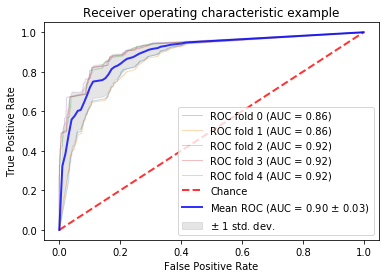

In [14]:
#Plot Roc Curve
roc_metrics(Bn,by, clf, 5)
plt.show()

### 1.2.5 Rule Based

In [19]:
Bn['Target'] = by
from Orange.data import Domain, DiscreteVariable, Table, ContinuousVariable
domain = Domain([DiscreteVariable.make(name='Type', values=['1', '2']),
                 DiscreteVariable.make(name='Gender', values=['1', '2', '3']),
                 DiscreteVariable.make(name='FurLength', values=['1', '2']),
                 DiscreteVariable.make(name='agecat', values=['0','1', '2', '3','4']),
                 DiscreteVariable.make(name='breedcat', values=['0', '1']),
                 DiscreteVariable.make(name='namecat', values=['0', '1']),
                 DiscreteVariable.make(name='descriptcat', values=['0', '1']),
                 DiscreteVariable.make(name='colorcat', values=['0','1', '2']),
                 DiscreteVariable.make(name='colorcat2', values=['0', '1']),
                 DiscreteVariable.make(name='healthcat', values=['0', '1']),
                 DiscreteVariable.make(name='statecat', values=['0', '1']),
                 DiscreteVariable.make(name='MaturitySizecat', values=['0', '1']),
                 DiscreteVariable.make(name='Photocat', values=['0','1', '2', '3','4', '5']),
                 DiscreteVariable.make(name='quantitycat', values=['0', '1']),
                 DiscreteVariable.make(name='paidcat', values=['0', '1'])],
                 DiscreteVariable(name='Target', values=['0','1']))
data = Table.from_numpy(domain,Bn)
data.domain

[Type, Gender, FurLength, agecat, breedcat, namecat, descriptcat, colorcat, colorcat2, healthcat, statecat, MaturitySizecat, Photocat, quantitycat, paidcat | Target]

In [20]:
learner = Orange.classification.CN2UnorderedLearner()

# consider up to 10 solution streams at one time
learner.rule_finder.search_algorithm.beam_width = 10

# continuous value space is constrained to reduce computation time
learner.rule_finder.search_strategy.constrain_continuous = True

# found rules must cover at least 15 examples
learner.rule_finder.general_validator.min_covered_examples = 15

# found rules may combine at most 2 selectors (conditions)
learner.rule_finder.general_validator.max_rule_length = 2

res = Orange.evaluation.CrossValidation(data, [learner], k=5)

C:\Users\peped\Miniconda3\envs\AA\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: calling Validation's constructor with data and learners is deprecated;
construct an instance and call it
  from ipykernel import kernelapp as app


In [21]:
#Don't know how to get scores for multi-class problem
CA = Orange.evaluation.CA(res)
F1 = Orange.evaluation.F1(res)

print('Accuracy: ', CA)
print('F1: ', F1)

Accuracy:  [0.63]
F1:  [0.65]


In [22]:
Bn = Bn.drop(['Target'], axis=1)

We see that our classifier does not perform very well, normally we would try to see what rules are being used and how we could improve performance, but due to lack of documentation for Orange's python libraries we are not able to do it. Even get this far implicated a lot of trial and error given that the documentation is not clear on many aspects in particular loading the data into an Orange table.

### 1.2.6 Bernoulli Naive Bayes

<Figure size 1296x576 with 0 Axes>

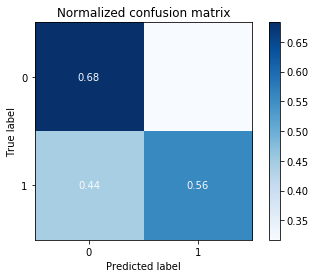

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      2669
           1       0.64      0.56      0.60      2709

    accuracy                           0.62      5378
   macro avg       0.62      0.62      0.62      5378
weighted avg       0.62      0.62      0.62      5378



In [15]:
clf = (BernoulliNB())
#Create Metrics
plt, metrics= model_metrics(Bn, by, clf, [0,1])
plt.show()
print(metrics)

### 1.2.7 Voting Classifier

#### 1.2.7.1 Calibration

<function matplotlib.pyplot.show(*args, **kw)>

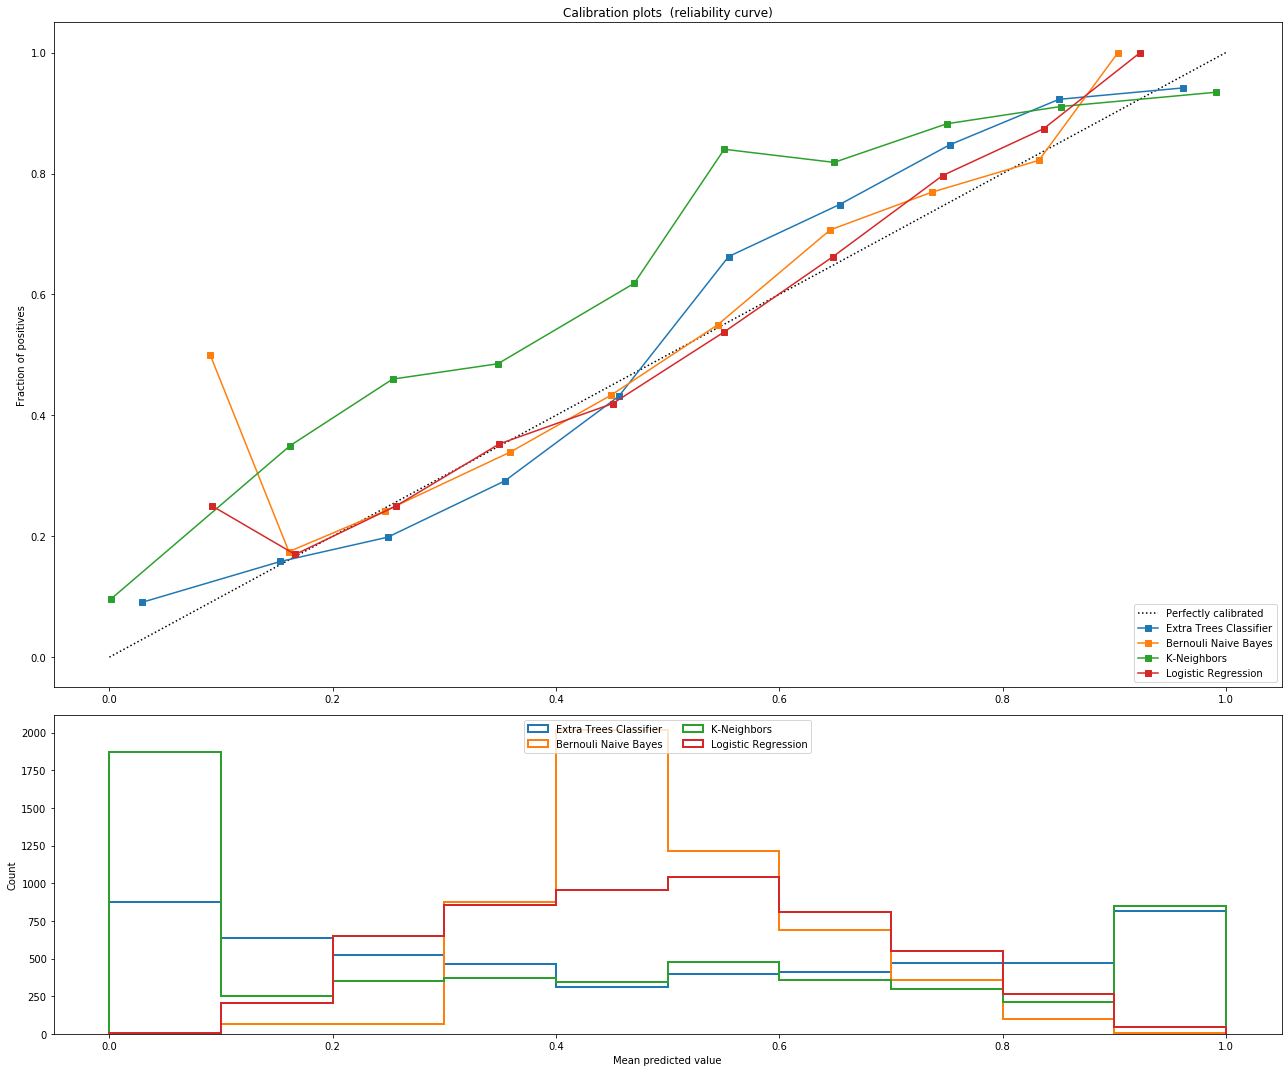

In [8]:
# Create classifiers

#Random forest Classifier
etc = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                 criterion='entropy', max_depth=40, max_features='auto',
                 max_leaf_nodes=None, max_samples=None,
                 min_impurity_decrease=0.0, min_impurity_split=None,
                 min_samples_leaf=1, min_samples_split=5,
                 min_weight_fraction_leaf=0.0, n_estimators=1366,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

#Naive Bayes Classifier
bnb = BernoulliNB()

#K-Neighbors Classifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='distance')

#Log Classifier
logit = LogisticRegression(C=21.793193953934416, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000000, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='liblinear',
                   tol=1e-06, verbose=0, warm_start=True)

clfs = [(etc, 'Extra Trees Classifier'),
        (bnb, 'Bernouli Naive Bayes'),
        (knn, 'K-Neighbors'),
        (logit, 'Logistic Regression')]

#Plot Calibration Curve

plt = plot_cal_curve(Bn, by, clfs)
plt.show

The `KNN`classifier exaggerates it's predictions, almost always, under-predicting positive cases. The Logistic and NaiveB classifiers also exaggerate a bit at low probabilities.

This classifiers are random forest is more or less well calibrated, but presents a sigmoid curve, typical of classifiers who average predictions.

Given this results we are not sure a soft voting method will be efficient, we will need to test it. Also the voting classifier will probably benefit from a higher weight in the `KNN`classifier, since it's probabilities are under estimated.

#### 1.2.7.2 Soft Voting

In [9]:
clfs = [('Extra Trees Classifier', etc),
        ('Bernouli Naive Bayes', bnb),
        ('K-Neighbors', knn),
        ('Logistic Regression', logit)]
Vclf = VotingClassifier(estimators=clfs, voting='soft')

<Figure size 1296x576 with 0 Axes>

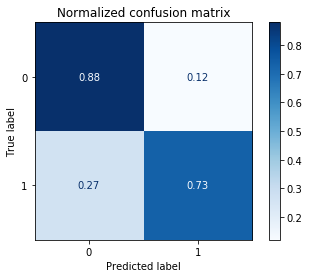

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      2669
           1       0.86      0.73      0.79      2709

    accuracy                           0.81      5378
   macro avg       0.81      0.81      0.81      5378
weighted avg       0.81      0.81      0.81      5378



In [83]:
#Create Metrics
plt, metrics= model_metrics(Bn, by, Vclf, [0,1])
plt.show()
print(metrics)

<Figure size 1296x576 with 0 Axes>

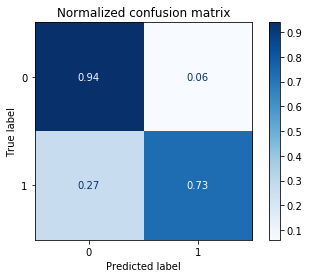

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      2151
           1       0.92      0.73      0.82      2151

    accuracy                           0.84      4302
   macro avg       0.85      0.84      0.83      4302
weighted avg       0.85      0.84      0.83      4302

Final model:


VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='entropy',
                                                   max_depth=40,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=5,
                                                   min_weight_fraction_leaf=0.0,
            

In [10]:
plt, estimator, metrics = cv_metrics(Bn, by, Vclf, [0,1], 5, quad=False)
plt.show()
print(metrics)
print('Final model:')
estimator

## 1.3 Classification by Type

In this part we intend to take our best classifier from the multiclass classification problem, and from the binary classification problem, and see if they perform better when classifying dogs and cats separately.

**Create Datasets**

For the binary problem we'll use an unbalanced data set, since if we separate cats from dogs, the dataset is naturally balanced

In [65]:
# MultiClass Datasets
Bl['AdoptionSpeed'] = my
#Dogs
Dd = Bl[Bl.Type == 1].reset_index()
dy = Dd['AdoptionSpeed']
#Cats
Cd = Bl[Bl.Type == 2].reset_index()
cy = Cd['AdoptionSpeed']

#Drop y
Bl = Bl.drop(['AdoptionSpeed'], axis=1)
#Dd = Dd.drop(['AdoptionSpeed', 'Type', 'index'], axis=1)
#Cd = Cd.drop(['AdoptionSpeed', 'Type', 'index'], axis=1)

# Binary Datasets
Bin['AdoptionSpeed'] = iby
#Dogs
Ddb = Bin[Bin.Type == 1].reset_index()
dyb = Ddb['AdoptionSpeed']
#Cats
Cdb = Bin[Bin.Type == 2].reset_index()
cyb = Cdb['AdoptionSpeed']

#Drop y
Bin = Bin.drop(['AdoptionSpeed'], axis=1)
Ddb = Ddb.drop(['AdoptionSpeed', 'Type', 'index'], axis=1)
Cdb = Cdb.drop(['AdoptionSpeed', 'Type', 'index'], axis=1)

### 1.3.1 Dogs

#### 1.3.1.1 MultiClass Classification

In [33]:
#Define Tree model
clf1 = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
#Define KNN model
clf2 = KNeighborsClassifier(algorithm='auto', leaf_size=49, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='distance')
#Create model list
clf_l = [('ET', clf1), ('KNN', clf2)]
#Define Voting Classifier
Vclf = VotingClassifier(estimators=clf_l, voting='soft')

<Figure size 1296x576 with 0 Axes>

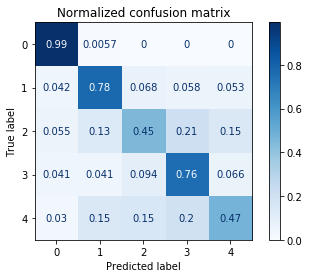

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       176
           1       0.67      0.78      0.72       190
           2       0.58      0.45      0.51       218
           3       0.64      0.76      0.70       244
           4       0.65      0.47      0.55       233

    accuracy                           0.68      1061
   macro avg       0.67      0.69      0.67      1061
weighted avg       0.67      0.68      0.66      1061

Quadratic Kappa Metric:  0.7117093961388798


In [59]:
plt, estimator, metrics, quad_kappa = cv_metrics(Dd, dy, Vclf, [0,1,2,3,4], 10)
plt.show()
print(metrics)
print('Quadratic Kappa Metric: ', quad_kappa)

#### 1.3.1.2 Binary Classification

Não percebo... o desempenho parece muito melhor mas a AUC é muito pior...

<Figure size 1296x576 with 0 Axes>

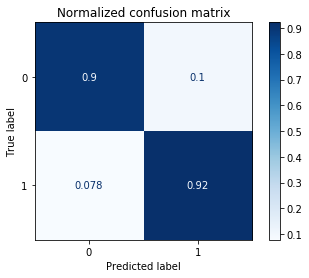

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       482
           1       0.96      0.92      0.94      1144

    accuracy                           0.92      1626
   macro avg       0.89      0.91      0.90      1626
weighted avg       0.92      0.92      0.92      1626



In [78]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
plt, estimator, metrics = cv_metrics(Ddb, dyb, clf, [0,1], 5, quad=False)
plt.show()
print(metrics)

### 1.3.2 Cats

#### 1.3.2.1 MultiClass Classification

In [60]:
#Define Tree model
clf1 = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=40, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=1366,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
#Define KNN model
clf2 = KNeighborsClassifier(algorithm='auto', leaf_size=49, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='distance')
#Create model list
clf_l = [('ET', clf1), ('KNN', clf2)]
#Define Voting Classifier
Vclf = VotingClassifier(estimators=clf_l, voting='soft')

<Figure size 1296x576 with 0 Axes>

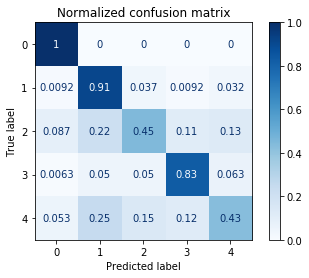

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       244
           1       0.69      0.91      0.78       217
           2       0.67      0.45      0.54       183
           3       0.75      0.83      0.79       159
           4       0.64      0.43      0.52       169

    accuracy                           0.75       972
   macro avg       0.73      0.72      0.71       972
weighted avg       0.74      0.75      0.73       972

Quadratic Kappa Metric:  0.7395748854832143


In [61]:
plt, estimator, metrics, quad_kappa = cv_metrics(Cd, cy, Vclf, [0,1,2,3,4], 10)
plt.show()
print(metrics)
print('Quadratic Kappa Metric: ', quad_kappa)

#### 1.3.2.2 Binary Classification

<Figure size 1296x576 with 0 Axes>

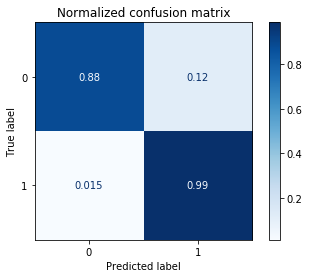

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       357
           1       0.96      0.99      0.97      1016

    accuracy                           0.96      1373
   macro avg       0.96      0.93      0.94      1373
weighted avg       0.96      0.96      0.96      1373



In [70]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
plt, estimator, metrics = cv_metrics(Cdb, cyb, Vclf, [0,1], 5, quad=False)
plt.show()
print(metrics)

### 1.3.3 Conclusions

Has we have seen on normally we can classify better separating dogs from cats, although we can classify cats much better then dogs... continue

# Test

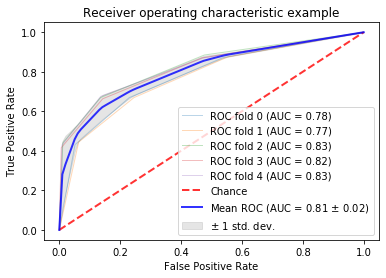

In [14]:
#Plot Roc Curve
roc_metrics(Bn,by, KNeighborsClassifier(n_neighbors=3), 5)
plt.show()

## 1.3. Classification - Results and Discussion 

ValueError: LogisticRegression should be a binary classifer

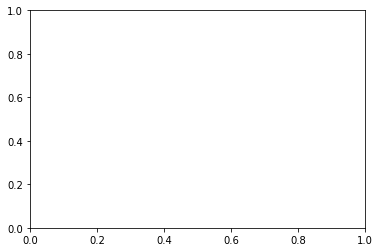

In [37]:
from scipy import interp
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
#get used features
c_del = []
for ix, cols in enumerate(Bl.columns):
    if Brfecv_logit.ranking_[ix] != 1:
        c_del.append(cols)
Logx = Bl.drop(c_del, axis=1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

#ROC analysis

classifier = Brfecv_logit.estimator_
fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(Logx, my)):
    viz = plot_roc_curve(classifier, Logx.iloc[test], my[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

#Plot ROC

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()